<a href="https://colab.research.google.com/github/zfukuoka/Training-KikaiGakusyuZukan/blob/master/Chap3_12_NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第3章 教師なし学習

## 12 NMF(Non-negative Matrix Factorization)

ポイント
* 次元削減手法
* 特徴
  * 元の行列の要素が非負である
  * 分解後の行列の要素が非負である
  * 潜在意味空間の各次元が直行するという制約をもたない
* 上記特徴から上げられる利点
  * 分析結果が解釈しやすい
    * 文章データに適用した際に文章の潜在変数の足し算で表現できるので、例えば、ある文章が持っているトピックという観点で数値化すると、下記の前者の方が分かりやすい
      * トピックA ⇒ 0.5、トピックB ⇒ 0.3
      * トピックA ⇒ -0.3、トピックB ⇒ 0.6
    * 潜在変数が直行する制約がないため、各潜在変数がある程度重複した情報を持つ



In [1]:
from sklearn.decomposition import NMF
from sklearn.datasets.samples_generator import make_blobs

centers = [[5, 10, 5], [10, 4, 10], [6, 8, 8]]
V, _ = make_blobs(centers=centers)

n_components = 2  # 潜在変数の数
model = NMF(n_components=n_components)
model.fit(V)

W = model.transform(V)  # 分解後の行列
H = model.components_
print(W)
print(H)

[[0.88095938 0.66611239]
 [0.81598402 0.9425787 ]
 [1.46978294 0.33632267]
 [0.61889288 1.01913888]
 [0.70657816 0.99897435]
 [1.44672991 0.13234172]
 [0.8388849  0.9108666 ]
 [0.56061624 1.07222427]
 [0.520874   1.17054127]
 [0.73060851 0.9869461 ]
 [0.94958577 0.69263033]
 [0.61570493 1.07066036]
 [1.28570604 0.1710786 ]
 [1.2744498  0.23494137]
 [0.81886743 0.90379999]
 [0.59685574 1.03863118]
 [0.75563965 0.57641919]
 [1.38299359 0.16466452]
 [0.82685793 0.78205135]
 [1.38937589 0.04268052]
 [0.52562531 1.22381643]
 [0.79483471 0.84299298]
 [1.02113329 0.7513524 ]
 [1.24192311 0.3556091 ]
 [0.9685974  0.73229672]
 [1.05635166 0.55732628]
 [0.68671459 1.12561318]
 [1.54184503 0.21034267]
 [1.24016627 0.41076129]
 [0.92471509 0.75182635]
 [0.52916945 0.92183538]
 [0.64261947 0.99706971]
 [1.30448167 0.49346359]
 [1.27298646 0.30501194]
 [0.65507203 1.04331846]
 [1.42714822 0.39125736]
 [1.3266923  0.20564522]
 [0.84811512 0.71219053]
 [0.97465927 0.64036815]
 [0.61679487 1.08852123]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


上記のサンプルだけではわかりにくいので、本に書いてあったように PCAで同じ２分割 の結果で比較してみる。




shape(V): (100, 3)
shape(PCA):  (100, 2)
shape(NMF):  (100, 2)


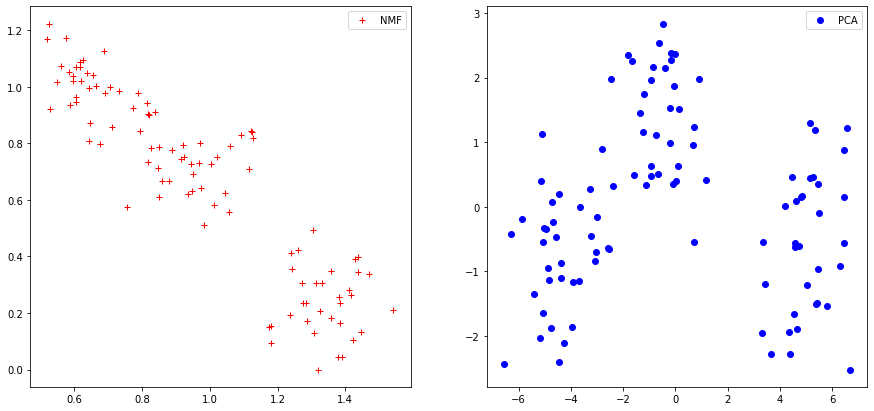

In [12]:
from sklearn.decomposition import PCA

model2 = PCA(n_components=n_components)
model2 = model2.fit(V)
result = model2.transform(V)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(W[0:,0], W[0:,1], 'r+', label="NMF")
ax2.plot(result[0:,0], result[0:,1], 'bo', label="PCA")
ax1.legend()
ax2.legend()
fig.show()

print("shape(V):", V.shape)
print("shape(PCA): ", result.shape)
print("shape(NMF): ", W.shape)